# An Exploration of Fluctuating Channel Flow

This is a sandbox for exploring the fluctuating channel flow data. Data is loaded using the YT package. You might need to install (using `pip`):
1. Jupyter (and Jupyter Lab)
2. YT
3. numpy
4. matplotlib

... Have fun!

## Import Basics

In [1]:
import sys, os, os.path
import glob

import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

Inline plots and namespace:

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Utilities

Replace `phi` with `concentration` in plot file's header file (yt doesn't like `phi`...)

In [3]:
### Replace "phi" with "concentration" in plt header file (yt doesn't like phi...)
def substitute_header(plt_file, source="phi", target="con"):
    
    # load header file
    header_file = os.path.join(plt_file, "Header")
    with open(header_file, "r") as f:
        header_orig = f.readlines()
    
    # select variable lables
    n_lables   = int(header_orig[1])
    l_offset   = 2
    
    # make a backup copy(iff the source was found in original)
    if source+"\n" in header_orig:
        header_cpy  = os.path.join(plt_file, "Header.backup")
        with open(header_cpy, "w") as f:
            for line in header_orig:
                f.write(line)
    
    # replace source with target
    for i in range(l_offset, n_lables+l_offset):
        if header_orig[i] == source+"\n":
            header_orig[i] = target+"\n"
    
    # save substituted file in place of original
    with open(header_file, "w") as f:
        for line in header_orig:
            f.write(line)

# Find Data

Currently we're working in the same directory as a the data $=>$ look in `.` for plot files

In [4]:
data_root = "."
data_dir  = "."

In [5]:
data_path = os.path.join(data_root, data_dir)

In [6]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [7]:
file_fmt

'plt{:05d}'

In [8]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()
print(data_files)

['././plt0000000', '././plt0000020', '././plt0000040', '././plt0000060', '././plt0000080', '././plt0000100', '././plt0000120', '././plt0000140', '././plt0000160', '././plt0000180', '././plt0000200', '././plt0000220', '././plt0000240', '././plt0000260', '././plt0000280', '././plt0000300', '././plt0000320', '././plt0000340', '././plt0000360', '././plt0000380', '././plt0000400', '././plt0000420', '././plt0000440', '././plt0000460', '././plt0000480', '././plt0000500', '././plt0000520']


## Plot Final State of the Simulation

In [9]:
def plot_index(data_file, str_field, str_coord):
    substitute_header(data_file)
    
    # Loads the data file
    ds = yt.load(data_file)
    
    # Takes a slice perpendicular to the coordinate represented by `str_coord`
    # -> the slice is at the center of the box.
    # -> the data field being sliced has to have the same name as `str_field`
    slc = yt.SlicePlot(ds, str_coord, str_field)
    
    # Set the plotted variable to log scale
    #slc.set_log(str_field, True)
    
    # Show data
    slc.show()
    #slc.save("step_0.png")

Let's find out what fields are contained in the plot file

In [10]:
ds = yt.load(data_files[-1])
ds.field_list

yt : [INFO     ] 2019-07-05 21:18:42,224 Parameters: current_time              = 0.05200000000000046
yt : [INFO     ] 2019-07-05 21:18:42,225 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-05 21:18:42,226 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-05 21:18:42,227 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'divergence'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer')]

Plot the last plot file's $y$-velocity (slicing normal the $y$-axis).

yt : [INFO     ] 2019-07-05 21:18:43,816 Parameters: current_time              = 0.05200000000000046
yt : [INFO     ] 2019-07-05 21:18:43,817 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-05 21:18:43,818 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-05 21:18:43,819 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-05 21:18:44,101 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-05 21:18:44,102 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-05 21:18:44,104 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-05 21:18:44,106 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-05 21:18:44,108 Making a fixed resolution buffer of (('boxlib', 'shifted_vely')) 800 by 800
yt : [WARNING  ] 2019-07-05 21:18:44,139 Plot image for field ('boxlib', 'shifted_vely') has no positive values.  Max = -0.003981.
yt : [WARNING  ] 2019-07-05 21:18:44,140 Switching to linear colorbar scaling.



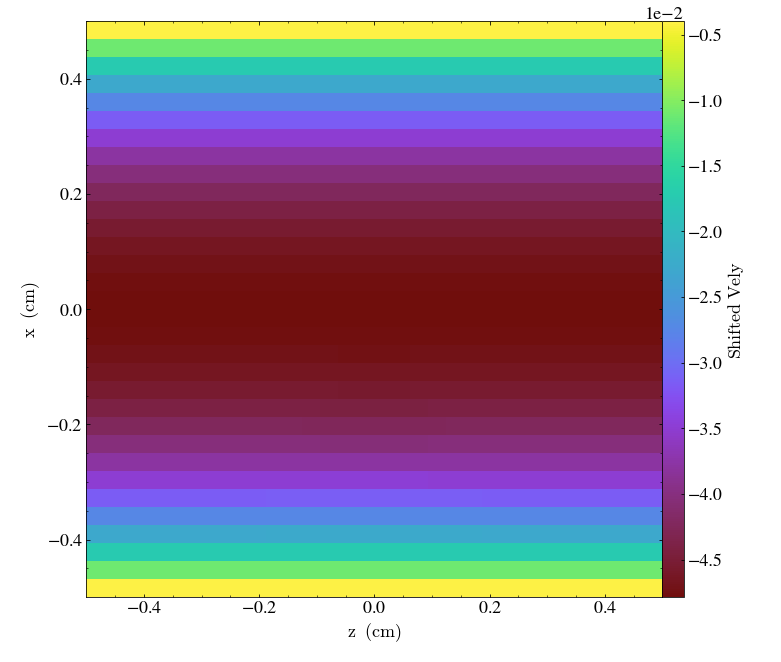

In [11]:
plot_index(data_files[-1], "shifted_vely", "y")

Let's do the same for the presure

yt : [INFO     ] 2019-07-05 21:18:47,968 Parameters: current_time              = 0.05200000000000046
yt : [INFO     ] 2019-07-05 21:18:47,969 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-05 21:18:47,970 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-05 21:18:47,971 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-05 21:18:48,193 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-05 21:18:48,195 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-05 21:18:48,196 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-05 21:18:48,198 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-05 21:18:48,200 Making a fixed resolution buffer of (('boxlib', 'pres')) 800 by 800
yt : [WARNING  ] 2019-07-05 21:18:48,239 Plot image for field ('boxlib', 'pres') has both positive and negative values. Min = -1.469348, Max = 0.362504.
yt : [WARNING  ] 2019-07-05 21:18:48,240 Switching to symlog colorbar scaling unless linear scali


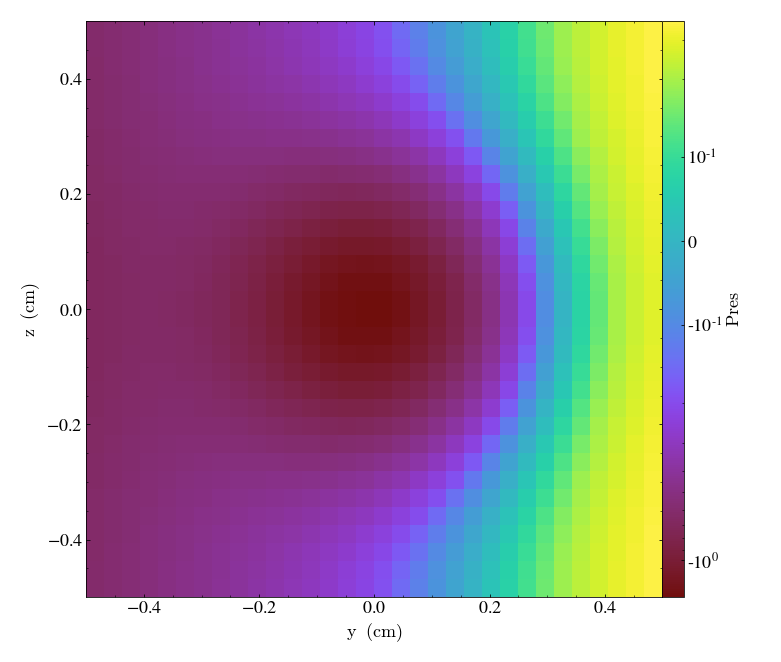

In [12]:
plot_index(data_files[-1], "pres", "x")

# Analyse Data

... with `numpy`

## Velocity fluctuations

In [13]:
ds = yt.load(data_files[-1])

yt : [INFO     ] 2019-07-05 21:18:52,357 Parameters: current_time              = 0.05200000000000046
yt : [INFO     ] 2019-07-05 21:18:52,358 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-05 21:18:52,359 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-05 21:18:52,360 Parameters: domain_right_edge         = [1. 1. 1.]


Get information about geometry: $\mathrm{d}x$ and index of centre

In [14]:
dx = np.array(
    [
        ( ds.domain_right_edge[i] - ds.domain_left_edge[i] ) / ds.domain_dimensions[i] 
        for i in range(ds.dimensionality) 
    ]
)


centre_slice = np.array([ei for ei in ds.domain_right_edge ])/2
ind_cen      = centre_slice / dx
print(ind_cen)

[16. 16. 16.]


Extract a "cube of data" from the plot file. This might seem a bit convoluted, but remember that YT is built to handle multi-level data. This function covers a given level (in our case, level 0) with a 3D grid (cube) and exports the data into a dict of `numpy` arrays. This way `cube["filed name"]` is a 3D numpy array.

In [15]:
cube = ds.covering_grid(level=0, fields=["shifted_velx", "shifted_vely", "shifted_velz"], 
                        left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
velx = cube["shifted_velx"]
vely = cube["shifted_vely"]
velz = cube["shifted_velz"]

Double-check the data.

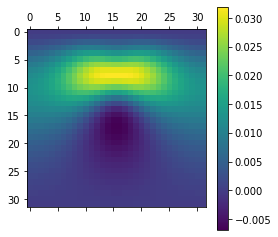

In [16]:
matshow(velx[:, 8, :])
colorbar()

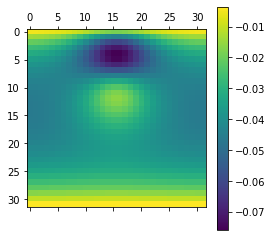

In [17]:
matshow(vely[:, 8, :])
colorbar()

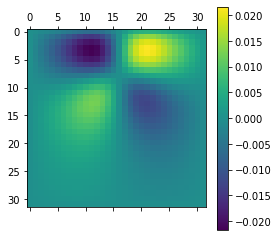

In [18]:
matshow(velz[:, 8, :])
colorbar()

In [19]:
class SoA:
    _pref = "particle_"
    _pos  = "position_"
    _vel  = "vel"
    def __init__(self, data):
        str_pos = self._pref+self._pos
        self.px = np.array(data[str_pos + "x"])
        self.py = np.array(data[str_pos + "y"])
        self.pz = np.array(data[str_pos + "z"])

        str_vel = self._pref+self._vel
        self.vx = np.array(data[str_vel + "x"])
        self.vy = np.array(data[str_vel + "y"])
        self.vz = np.array(data[str_vel + "z"])

        
    def __str__(self):
        return "{pos:"  + str(self.px) + "," + str(self.py) + "," + str(self.pz) + \
              "; vel:"  + str(self.vx) + "," + str(self.vy) + "," + str(self.vz) + "}"


    def __repr__(self):
        return str(self)



class Particle:
    def __init__(self, px, py, pz, vx, vy, vz):
        self.pos = np.array([px, py, pz])
        self.vel = np.array([vx, vy, vz])


    def __str__(self):
        return "P(" + str(self.pos) + "," + str(self.vel) + "," + ")"


    def __repr__(self):
        return str(self)


class AoS:
    def __init__(self, amrex_data):
        self.particles = list()
        soa = SoA(amrex_data)
        
        data = zip(soa.px, soa.py, soa.pz, soa.vx, soa.vy, soa.vz)
        for elt in data:
            self.particles.append(Particle(* elt))



In [20]:
ds = AMReXDataset(data_files[-1])

yt : [INFO     ] 2019-07-05 21:18:58,056 Parameters: current_time              = 0.05200000000000046
yt : [INFO     ] 2019-07-05 21:18:58,057 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-05 21:18:58,058 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-05 21:18:58,059 Parameters: domain_right_edge         = [1. 1. 1.]


In [21]:
ds.particle_fields_by_type

defaultdict(list,
            {'immbdy_markers': ['particle_cpu',
              'particle_cpu_0',
              'particle_cpu_1',
              'particle_forcex',
              'particle_forcey',
              'particle_forcez',
              'particle_id',
              'particle_id_0',
              'particle_id_1',
              'particle_position_x',
              'particle_position_y',
              'particle_position_z',
              'particle_pred_forcex',
              'particle_pred_forcey',
              'particle_pred_forcez',
              'particle_pred_posx',
              'particle_pred_posy',
              'particle_pred_posz',
              'particle_pred_velx',
              'particle_pred_vely',
              'particle_pred_velz',
              'particle_radius',
              'particle_velx',
              'particle_vely',
              'particle_velz']})

In [22]:
ad = ds.all_data()
soa = SoA(ad)
aos = AoS(ad)

In [23]:
aos.particles

[P([0.26215657 0.49884901 0.5       ],[-1.01246623e+00 -3.88388354e-02 -2.50601060e-07],),
 P([0.25 0.5  0.5 ],[ 0.00000000e+00  0.00000000e+00 -2.49233094e-07],),
 P([0.25207989 0.5        0.5       ],[-1.02184708e+00  0.00000000e+00 -2.50788311e-07],)]

In [24]:
aos.particles[0].pos[0:3]

array([0.26215657, 0.49884901, 0.5       ])

In [25]:
positions_1=list()
positions_2=list()
positions_3=list()
for data_file in data_files:
    ds = AMReXDataset(data_file)
    ad = ds.all_data()
    aos = AoS(ad)
    positions_1.append(aos.particles[0].pos)
    positions_2.append(aos.particles[1].pos)
    positions_3.append(aos.particles[2].pos)

yt : [INFO     ] 2019-07-05 21:19:01,197 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-05 21:19:01,198 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-05 21:19:01,199 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-05 21:19:01,200 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-05 21:19:01,532 Parameters: current_time              = 0.0020000000000000005
yt : [INFO     ] 2019-07-05 21:19:01,533 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-05 21:19:01,534 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-05 21:19:01,535 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-05 21:19:01,939 Parameters: current_time              = 0.0039999999999999975
yt : [INFO     ] 2019-07-05 21:19:01,940 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-05 21:19:01,941 Parameters: domain_left_

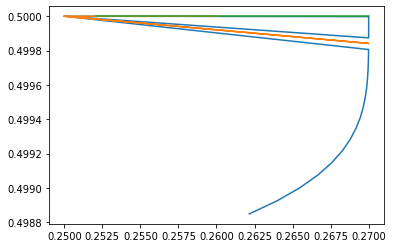

In [26]:
x_1 = np.array([pos[0] for pos in positions_1])
y_1 = np.array([pos[1] for pos in positions_1])

x_2 = np.array([pos[0] for pos in positions_2])
y_2 = np.array([pos[1] for pos in positions_2])

x_3 = np.array([pos[0] for pos in positions_3])
y_3 = np.array([pos[1] for pos in positions_3])

plot(x_1, y_1)
plot(x_2, y_2)
plot(x_3, y_3)

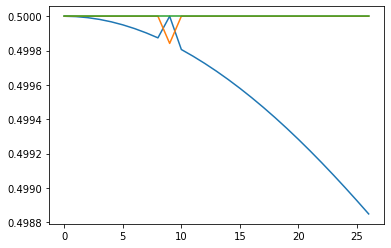

In [27]:
plot(y_1)
plot(y_2)
plot(y_3)

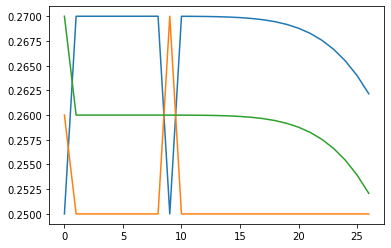

In [28]:
plot(x_1)
plot(x_2)
plot(x_3)

## Remove Average `vely`

The $y$-data might seem smooth. But there will be tiny fluctuations. In order to see those, let's compute the average in dimensions 2 and 3.

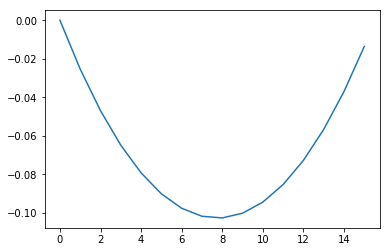

In [19]:
m_vely = mean(mean(vely[:, :, :], axis=1), axis=1)
#              ^^-- returns a 2D array of average velocities
#         ^^------- returns a 1D array of average velocities (the average of the previous average)
plot(m_vely)

Compute fluctuations: `m_vely` is applied to all `dim=1` slices

In [20]:
# slice-wise subtraction of the average velocity... 
# I can't think of a fancy pythonic way of doing this => I'll do it in this cumbersome way:
fluct_vely = np.zeros_like(vely)
for i in range(vely.shape[0]):
    for j in range(vely.shape[1]):
            fluct_vely[:, i, j] = vely[:, i, j] - m_vely[:]

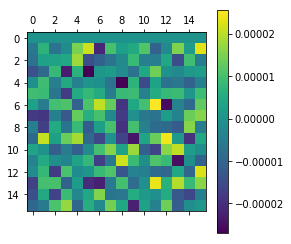

In [21]:
matshow(fluct_vely[:, 8, :])
colorbar()

## Compute $x$, $y$ and $z$ Temperatures (Fluctuations in `velx`, `vely`, `velz`)

In [22]:
t_x = mean(mean(velx[:, :, :]**2, axis=1), axis=1)
#           ^^-- returns a 2D array of average velocities
#      ^^------- returns a 1D array of average velocities (the average of the previous average)
t_x = sqrt(t_x)

In [23]:
t_y = mean(mean(fluct_vely[:, :, :]**2, axis=1), axis=1)
#           ^^-- returns a 2D array of average velocities
#      ^^------- returns a 1D array of average velocities (the average of the previous average)
t_y = sqrt(t_y)

In [24]:
t_z = mean(mean(velz[:, :, :]**2, axis=1), axis=1)
#           ^^-- returns a 2D array of average velocities
#      ^^------- returns a 1D array of average velocities (the average of the previous average)
t_z = sqrt(t_z)

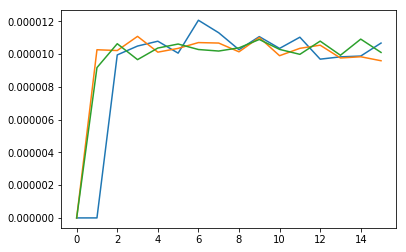

In [25]:
plot(t_x)
plot(t_y)
plot(t_z)

We see that the $x$-fluctuations are supressed due to the wall $\Rightarrow{}$ needs fixing!

# Old Stuff $\Rightarrow{}$ Clean up at some point

In [22]:
def grad(phi):
    dphi_x = np.zeros_like(phi)
    dphi_y = np.zeros_like(phi)
    dphi_z = np.zeros_like(phi)
    
    dphi_x[ :-1, :, :] += phi[1:,   :, :]
    dphi_x[1:,   :, :] -= phi[ :-1, :, :]
    
    dphi_y[:,  :-1, :] += phi[:, 1:,   :]
    dphi_y[:, 1:,   :] -= phi[:,  :-1, :]
    
    dphi_z[:, :,  :-1] += phi[:, :, 1:, ]
    dphi_z[:, :, 1:  ] -= phi[:, :,  :-1]
    
    return dphi_x, dphi_y, dphi_z

In [23]:
grad_x, grad_y, grad_z = grad(cube["con"])

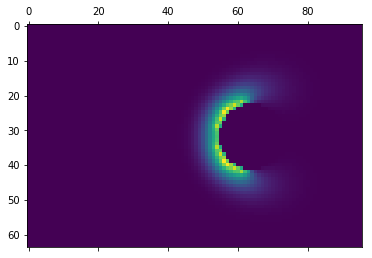

In [250]:
matshow(cube['con'][32, :, :])

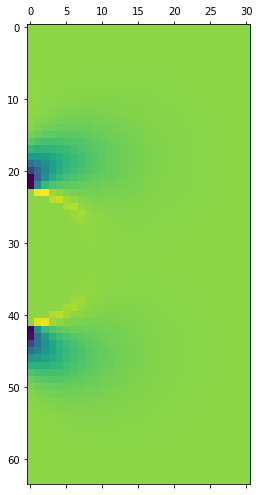

In [108]:
matshow(grad_z[32, :, 65:])

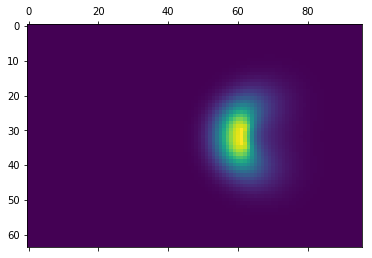

In [252]:
matshow(cube['con'][43, :, :])

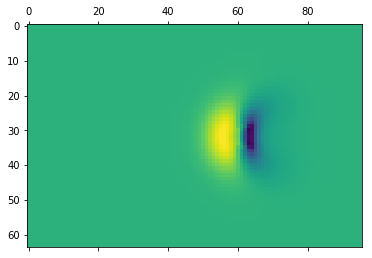

In [251]:
matshow(grad_z[43, :, :])

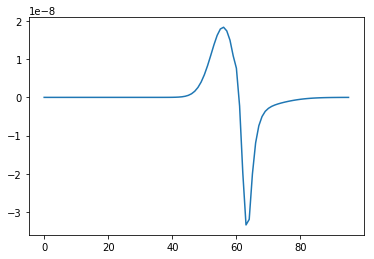

In [246]:
plot(grad_z[43, 30, :])

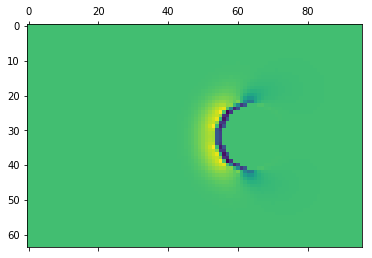

In [187]:
matshow(grad_z[32, :, :])

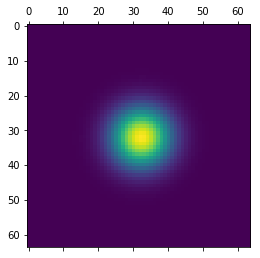

In [188]:
matshow(cube['con'][:, :, 45])

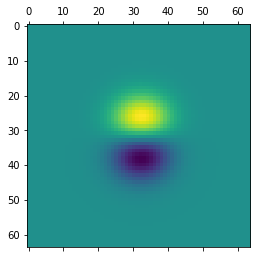

In [193]:
matshow(grad_x[:, :, 45])

In [490]:
def sphere_coord(i_x, i_y, i_z, dr=dx, r_c=centre_colloid):
    x = (i_x + 0.5)*dr[0] - r_c[0]
    y = (i_y + 0.5)*dr[1] - r_c[1]
    z = (i_z + 0.5)*dr[2] - r_c[2]
    
    r     = np.sqrt( x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi   = np.arctan2(y, x)
        
    return r, theta, phi

def r_unit(theta, phi):
    return np.array([
        np.sin(theta)*np.cos(phi),
        np.sin(theta)*np.sin(phi),
        np.cos(theta)
    ])

def theta_unit(theta, phi):
    return np.array([
        np.cos(theta)*np.cos(phi),
        np.cos(theta)*np.sin(phi),
       -np.sin(theta)
    ])

def phi_unit(phi):
    return np.array([
       -np.sin(phi),
        np.cos(phi),
        0
    ])

In [491]:
def grad_sphere(grad_x, grad_y, grad_z):
    grad_r     = np.zeros_like(grad_x)
    grad_phi   = np.zeros_like(grad_y)
    grad_theta = np.zeros_like(grad_z)
    
    r_dat     = np.zeros_like(grad_x)
    phi_dat   = np.zeros_like(grad_x)
    theta_dat = np.zeros_like(grad_x)
    
    for ind, x in ndenumerate(grad_x):
        y = grad_y[ind]
        z = grad_z[ind]
        
        r, theta, phi = sphere_coord(ind[0], ind[1], ind[2])
        r_vec     = r_unit(theta, phi)
        theta_vec = theta_unit(theta, phi)
        phi_vec   = phi_unit(phi)
        
        grad_r[ind]     = np.dot(np.array([x, y, z]), r_vec)
        grad_phi[ind]   = np.dot(np.array([x, y, z]), phi_vec)
        grad_theta[ind] = np.dot(np.array([x, y, z]), theta_vec)
        
        r_dat[ind]     = r
        phi_dat[ind]   = phi
        theta_dat[ind] = theta
        
    return np.array(grad_r), np.array(grad_phi), np.array(grad_theta), r_dat, phi_dat, theta_dat

In [492]:
grad_r, grad_phi, grad_theta, r_dat, phi_dat, theta_dat = grad_sphere(grad_x, grad_y, grad_z)

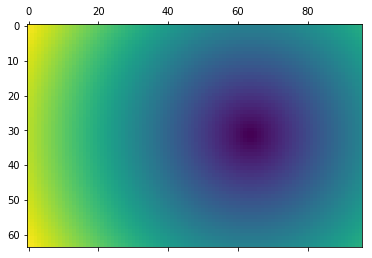

In [493]:
matshow(r_dat[32, :, :])

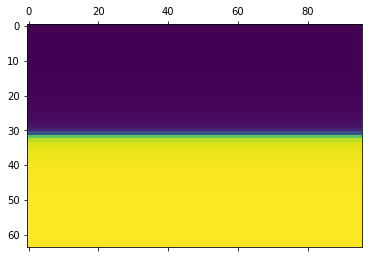

In [494]:
matshow(phi_dat[32, :, :])

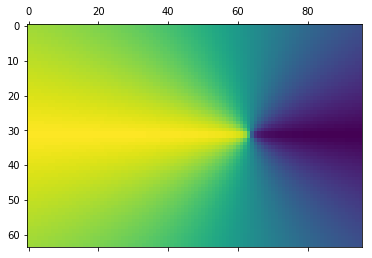

In [495]:
matshow(theta_dat[32, :, :])

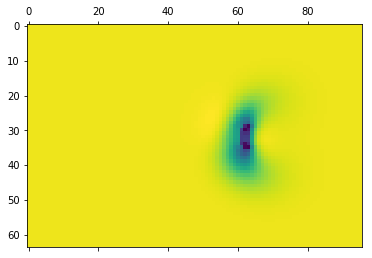

In [496]:
matshow(grad_norm[43, :, :])

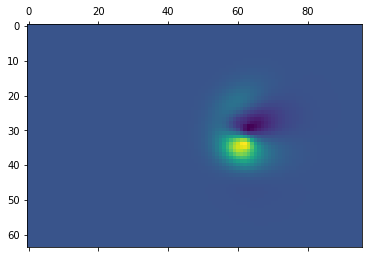

In [497]:
matshow(grad_phi[45, :, :])

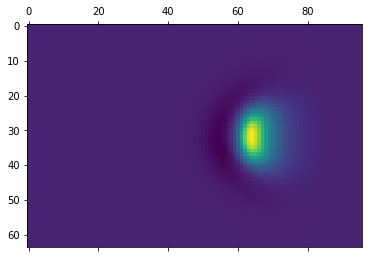

In [498]:
matshow(grad_theta[45, :, :])

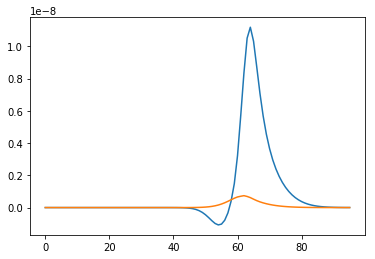

In [507]:
plot(grad_theta[45, 32, :])
plot(grad_phi[45, 40, :])

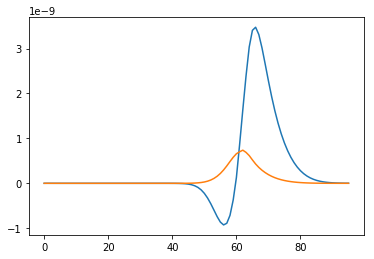

In [500]:
plot(grad_theta[45, 40, :])
plot(grad_phi[45, 40, :])

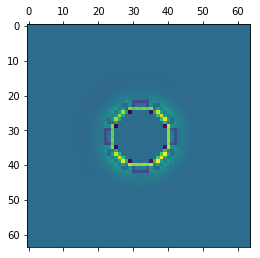

In [501]:
matshow(grad_theta[:, :, 60])

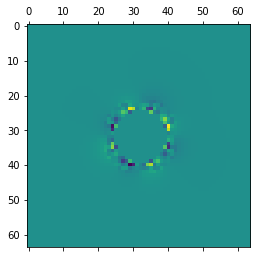

In [502]:
matshow(grad_phi[:, :, 60])

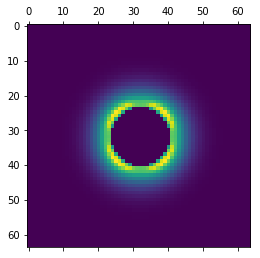

In [503]:
matshow(cube['con'][:, :, 60])

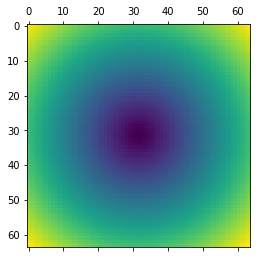

In [504]:
matshow(r_dat[:, :, 60])

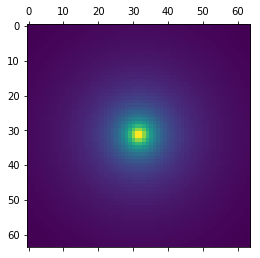

In [505]:
matshow(theta_dat[:, :, 60])

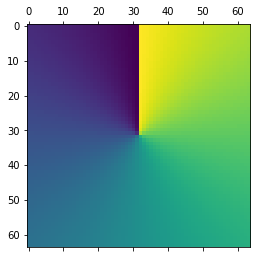

In [506]:
matshow(phi_dat[:, :, 60])

In [566]:
def scan_theta(r, phi, theta_range, grad_x, grad_y, grad_z, r_c=centre_colloid, dr=dx):
    scan = np.zeros_like(theta_range)
    
    for i, theta in enumerate(theta_range):
        x = r_c[0] + r * np.sin(theta)*np.cos(phi)
        y = r_c[1] + r * np.sin(theta)*np.sin(phi)
        z = r_c[2] + r * np.cos(theta)
                
        i_x = int(x / dx[0])
        i_y = int(y / dx[1])
        i_z = int(z / dx[2])
        
        dphi_x = grad_x[i_x, i_y, i_z]
        dphi_y = grad_y[i_x, i_y, i_z]
        dphi_z = grad_z[i_x, i_y, i_z]
        
        e_theta = theta_unit(theta, phi)
        scan[i] = np.dot(np.array([dphi_x, dphi_y, dphi_z]), -e_theta)
    
    return scan

In [575]:
x = np.linspace(0, np.pi, num=100)
y_1 = scan_theta(1.4e-3, 0.0, x, grad_x, grad_y, grad_z)
y_2 = scan_theta(1.4e-3, 0.5, x, grad_x, grad_y, grad_z)
y_3 = scan_theta(1.4e-3, 1, x, grad_x, grad_y, grad_z)

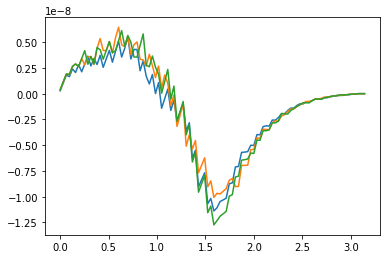

In [576]:
plot(np.pi-x, y_1)
plot(np.pi-x, y_2)
plot(np.pi-x, y_3)

In [536]:
y

array([-5.19956799e-12, -9.90351103e-12,  2.45341939e-11,  8.23369146e-11,
        7.14958822e-11,  1.59297975e-10,  2.61999920e-10,  1.72984853e-10,
        3.72419997e-10,  5.88664859e-10,  3.00852487e-10,  8.73706502e-10,
        6.30019379e-10,  1.50342756e-09,  1.77051944e-09,  2.45637687e-09,
        2.59605648e-09,  2.31715544e-09,  5.07192789e-09,  6.82647158e-09,
        6.27703487e-09,  1.17232692e-08,  2.37962129e-08,  2.23885478e-08,
        5.35642232e-08,  5.53590911e-08,  3.40695350e-08,  2.93257998e-08,
        5.97063264e-09, -1.03368693e-08, -8.55812215e-09,  1.01674588e-08,
       -8.58186650e-09, -6.43166241e-09,  1.32708742e-08, -2.06442949e-09,
       -3.68020493e-09,  8.11566168e-10, -1.95380568e-08,  3.11817098e-09,
       -6.21240799e-09, -1.30965645e-08,  1.00154766e-08, -3.32335727e-09,
       -1.34244697e-08, -1.42038172e-08, -1.19530449e-08, -7.31007113e-09,
       -2.25383236e-09, -2.81931432e-10])

In [509]:
sel = np.abs(r_dat - 1.1e-3) < 1e-3
sum(sel)

39016

In [510]:
theta_sel = theta_dat[sel]
phi_sel   = phi_dat[sel]

grad_norm_sel  = grad_norm[sel]
grad_phi_sel   = grad_phi[sel]
grad_theta_sel = grad_theta[sel]

In [511]:
phi_selector = np.abs(phi_sel - 0.6) < 1e-3
sum(phi_selector)

36

In [512]:
sorted_pts = np.array(sorted(zip(theta_sel[phi_selector], grad_theta_sel[phi_selector])))

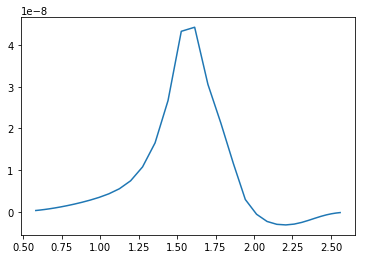

In [513]:
plot(sorted_pts[:,0], sorted_pts[:,1])

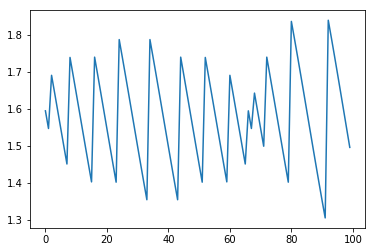

In [514]:
plot(theta_sel[:100])